In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from pandas import DataFrame
from numpy import array

Using TensorFlow backend.


In [2]:
# return training data
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = array(seq)
    X, y = seq[:,0], seq[:,1]
    X = X.reshape((5, 1, 1))
    return X, y

In [3]:
# return validation data
def get_val():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = array(seq)
    X, y = seq[:,0], seq[:,1]
    X = X.reshape((len(X), 1, 1))
    return X, y

In [4]:
# fit an LSTM model
def fit_model(n_cells):
    # define model
    model = Sequential()
    model.add(LSTM(n_cells, input_shape=(1, 1)))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mse', optimizer='adam')
    # fit model
    X, y = get_train()
    model.fit(X, y, epochs=500, shuffle=False, verbose=0)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

W1123 15:25:40.240531  6836 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1123 15:25:40.267704  6836 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 15:25:40.271971  6836 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1123 15:25:40.701332  6836 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1123 15:25:41.162591  6836 deprecation.py:323] From C:\Users\Lenovo\Anacond

> 1/5 param=1.000000, loss=0.115463
> 2/5 param=1.000000, loss=0.036851
> 3/5 param=1.000000, loss=0.167321
> 4/5 param=1.000000, loss=0.328401
> 5/5 param=1.000000, loss=0.152070
> 1/5 param=5.000000, loss=0.055990
> 2/5 param=5.000000, loss=0.112376
> 3/5 param=5.000000, loss=0.060618
> 4/5 param=5.000000, loss=0.067802
> 5/5 param=5.000000, loss=0.062518
> 1/5 param=10.000000, loss=0.054811
> 2/5 param=10.000000, loss=0.054020
> 3/5 param=10.000000, loss=0.017644
> 4/5 param=10.000000, loss=0.001375
> 5/5 param=10.000000, loss=0.010871
              1         5        10
count  5.000000  5.000000  5.000000
mean   0.160021  0.071861  0.027744
std    0.106800  0.023041  0.025025
min    0.036851  0.055990  0.001375
25%    0.115463  0.060618  0.010871
50%    0.152070  0.062518  0.017644
75%    0.167321  0.067802  0.054020
max    0.328401  0.112376  0.054811


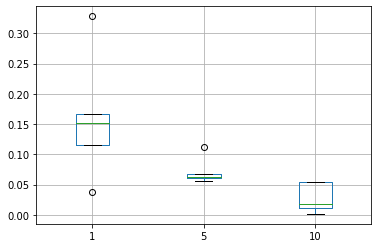

In [5]:
# define scope of search
params = [1, 5, 10]
n_repeats = 5
# grid search parameter values
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('> %d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
    
# summary statistics of results
print(scores.describe())
# box and whisker plot of results
scores.boxplot()
pyplot.show()